In [1]:
import matplotlib.pyplot as plt
# Add as many imports as you need.
# Add as many imports as you need.
# Add as many imports as you need.
import pandas as pd

from VNP.packages.data_alalysis import *
from VNP.packages.data_preperation import *
from VNP.packages.missing_values import *
from VNP.packages.visualization import *
from VNP.packages.models import *
from VNP.packages.evaluation import *
from VNP.packages.vnp_ez import *
%load_ext autoreload
%autoreload 2


In [2]:
from keras.api.models import Sequential
from keras.api.layers import Input, LSTM, Dense
import keras

In [6]:
df_target = pd.read_csv("../data/power_consumption_g1.csv")


In [7]:
df_target

,Datetime,PowerConsumption
0,2017-10-04 02:20:00,26802.27571
1,2017-05-28 13:20:00,32898.09836
2,2017-03-15 06:00:00,22304.68085
3,2017-10-31 11:40:00,32316.49891
4,2017-04-20 02:50:00,23982.43272
...,...,...
52411,2017-05-27 13:30:00,35000.65574
52412,2017-10-29 20:10:00,39425.12035
52413,2017-02-05 16:10:00,28751.18644
52414,2017-04-11 17:20:00,32098.51453


In [8]:
df = pd.read_csv("../data/power_consumption_g1_feat.csv")

In [9]:
df

,Datetime,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows
0,2017-03-01 16:40:00,21.33,55.91,0.080,387.400,427.300
1,2017-07-27 06:30:00,23.10,48.58,4.908,10.450,8.630
2,2017-10-11 19:00:00,23.10,59.82,0.084,0.446,0.322
3,2017-02-10 06:50:00,12.25,80.80,4.916,0.051,0.111
4,2017-03-06 16:00:00,15.62,59.38,0.075,533.400,579.900
...,...,...,...,...,...,...
52411,2017-05-14 02:20:00,23.58,43.10,0.075,0.110,0.122
52412,2017-11-17 19:20:00,17.30,76.50,0.075,0.040,0.148
52413,2017-03-21 12:10:00,17.90,50.28,0.081,837.000,296.700
52414,2017-07-28 05:10:00,25.23,61.32,4.907,0.091,0.119


In [11]:
df["Datetime"] = pd.to_datetime(df["Datetime"])
df.set_index(keys=["Datetime"], inplace=True)
df.sort_index(inplace=True)

In [12]:
df

,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows
Datetime,,,,,
2017-01-01 00:00:00,6.559,73.8,0.083,0.051,0.119
2017-01-01 00:10:00,6.414,74.5,0.083,0.070,0.085
2017-01-01 00:20:00,6.313,74.5,0.080,0.062,0.100
2017-01-01 00:30:00,6.121,75.0,0.083,0.091,0.096
2017-01-01 00:40:00,5.921,75.7,0.081,0.048,0.085
...,...,...,...,...,...
2017-12-30 23:10:00,7.010,72.4,0.080,NaN,0.096
2017-12-30 23:20:00,6.947,72.6,0.082,0.051,0.093
2017-12-30 23:30:00,6.900,72.8,0.086,0.084,0.074


In [13]:
df_target["Datetime"] = pd.to_datetime(df_target["Datetime"])
df_target.set_index(keys=["Datetime"], inplace=True)
df_target.sort_index(inplace=True)

In [14]:
df_target

,PowerConsumption
Datetime,
2017-01-01 00:00:00,34055.69620
2017-01-01 00:10:00,29814.68354
2017-01-01 00:20:00,29128.10127
2017-01-01 00:30:00,28228.86076
2017-01-01 00:40:00,27335.69620
...,...
2017-12-30 23:10:00,31160.45627
2017-12-30 23:20:00,30430.41825
2017-12-30 23:30:00,29590.87452


In [17]:
df_joined = df.join(df_target, on=df.index).drop(columns="key_0")

In [18]:
df_joined

,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows,PowerConsumption
Datetime,,,,,,
2017-01-01 00:00:00,6.559,73.8,0.083,0.051,0.119,34055.69620
2017-01-01 00:10:00,6.414,74.5,0.083,0.070,0.085,29814.68354
2017-01-01 00:20:00,6.313,74.5,0.080,0.062,0.100,29128.10127
2017-01-01 00:30:00,6.121,75.0,0.083,0.091,0.096,28228.86076
2017-01-01 00:40:00,5.921,75.7,0.081,0.048,0.085,27335.69620
...,...,...,...,...,...,...
2017-12-30 23:10:00,7.010,72.4,0.080,NaN,0.096,31160.45627
2017-12-30 23:20:00,6.947,72.6,0.082,0.051,0.093,30430.41825
2017-12-30 23:30:00,6.900,72.8,0.086,0.084,0.074,29590.87452


In [19]:
df_joined.isna().sum()

Temperature            559
Humidity               499
WindSpeed              529
GeneralDiffuseFlows    524
DiffuseFlows           505
PowerConsumption         0
dtype: int64

In [20]:
features = df_joined.columns

In [21]:
df_1 = df_joined.copy()

In [22]:
for feature in features:
    df_1[feature] = df_1[feature].interpolate(method="linear")

In [23]:
df_1

,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows,PowerConsumption
Datetime,,,,,,
2017-01-01 00:00:00,6.559,73.8,0.083,0.051,0.119,34055.69620
2017-01-01 00:10:00,6.414,74.5,0.083,0.070,0.085,29814.68354
2017-01-01 00:20:00,6.313,74.5,0.080,0.062,0.100,29128.10127
2017-01-01 00:30:00,6.121,75.0,0.083,0.091,0.096,28228.86076
2017-01-01 00:40:00,5.921,75.7,0.081,0.048,0.085,27335.69620
...,...,...,...,...,...,...
2017-12-30 23:10:00,7.010,72.4,0.080,0.055,0.096,31160.45627
2017-12-30 23:20:00,6.947,72.6,0.082,0.051,0.093,30430.41825
2017-12-30 23:30:00,6.900,72.8,0.086,0.084,0.074,29590.87452


In [24]:
df_1.isna().sum()

Temperature            0
Humidity               0
WindSpeed              0
GeneralDiffuseFlows    0
DiffuseFlows           0
PowerConsumption       0
dtype: int64

<Axes: >

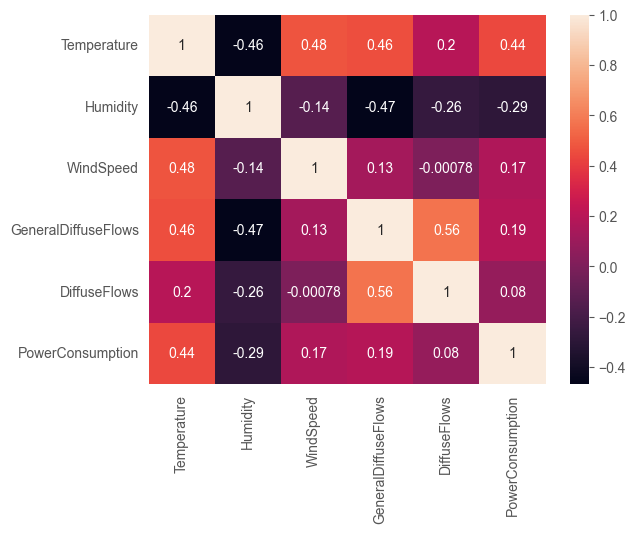

In [25]:
sns.heatmap(df_1.corr(),annot=True)

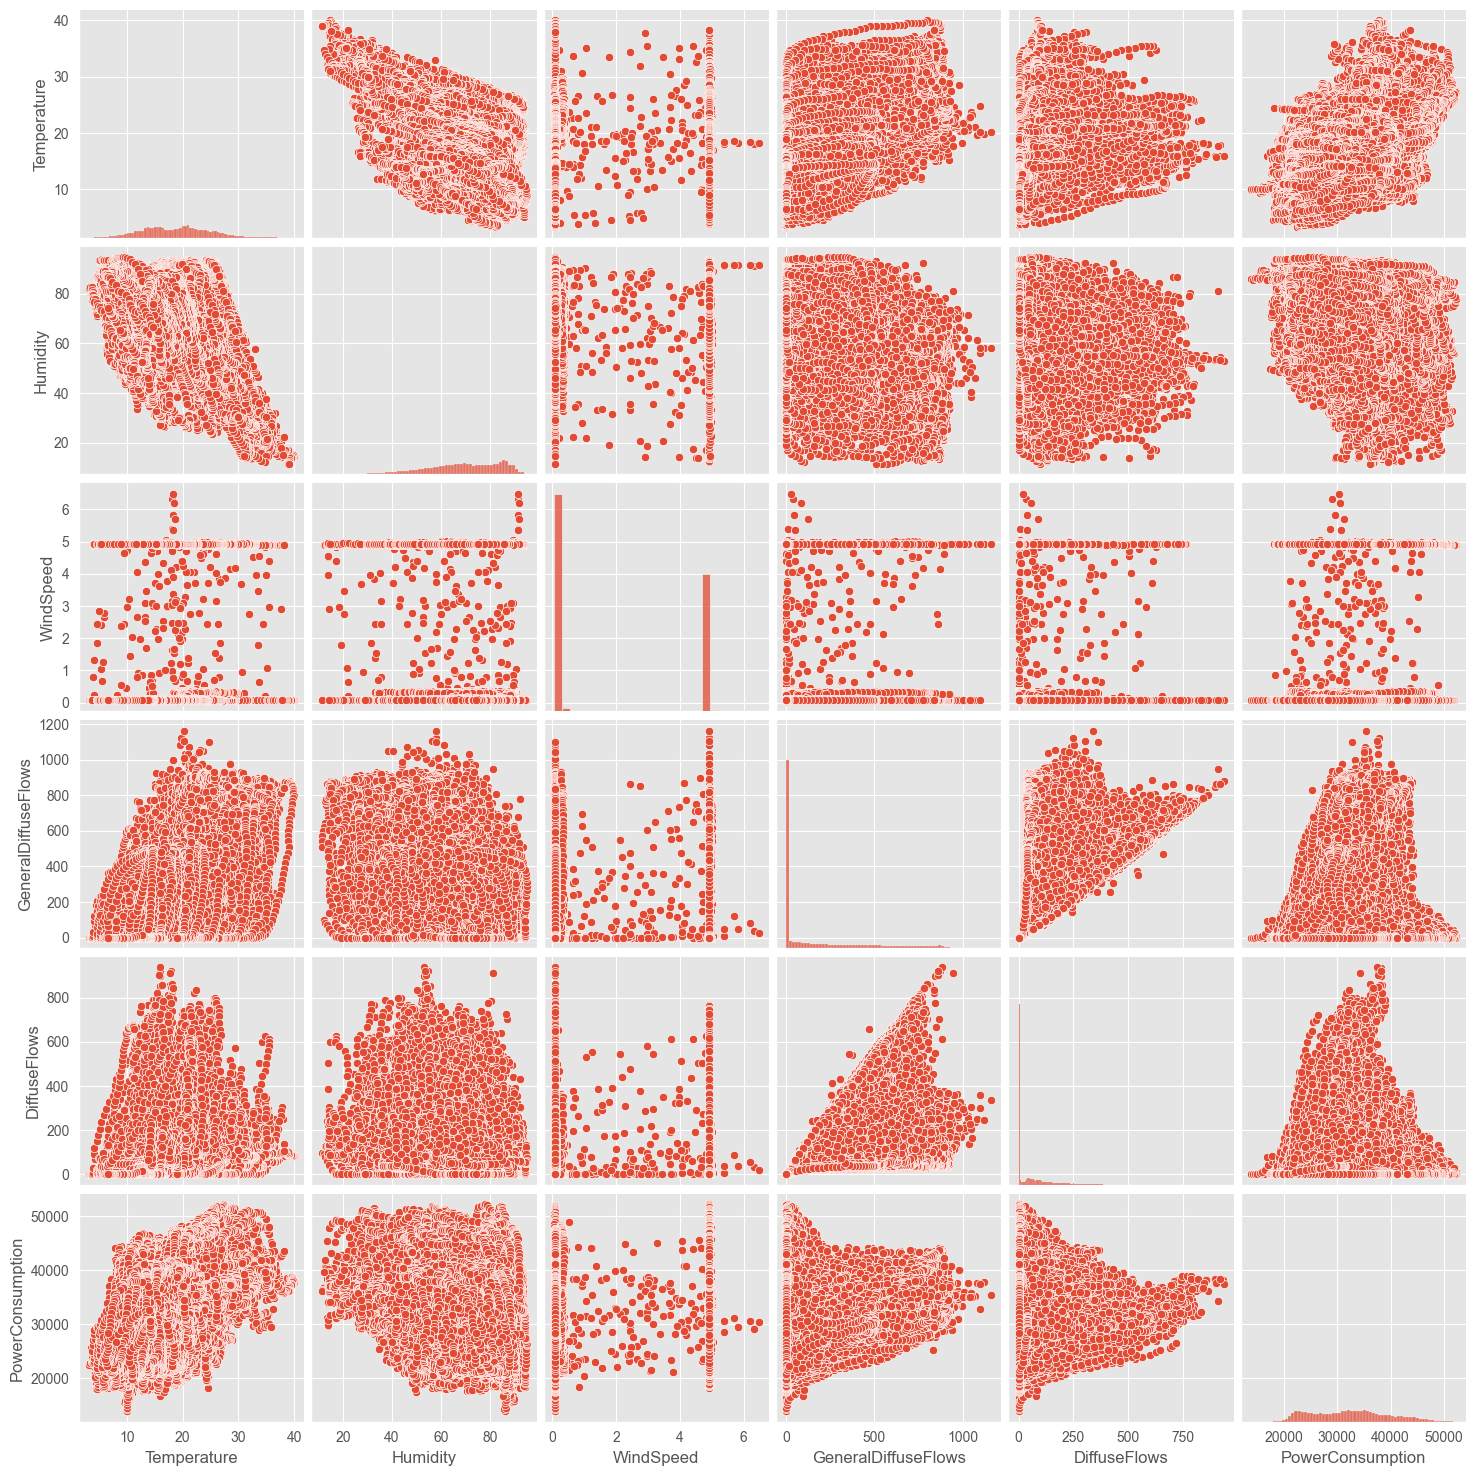

In [26]:
sns.pairplot(df_1)

<Axes: >

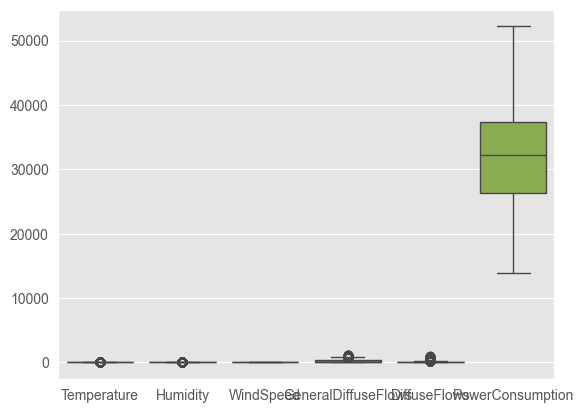

In [27]:
sns.boxplot(df_1)

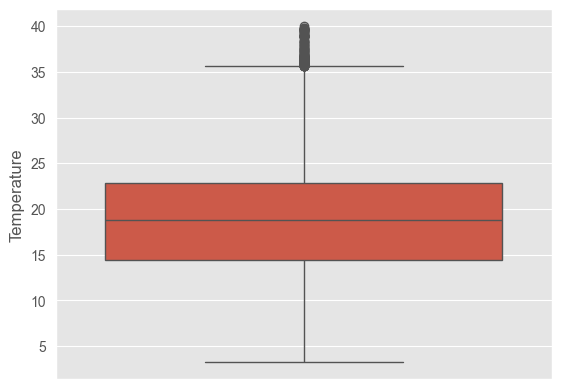

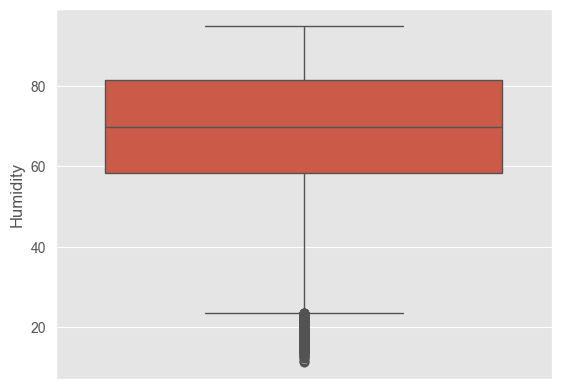

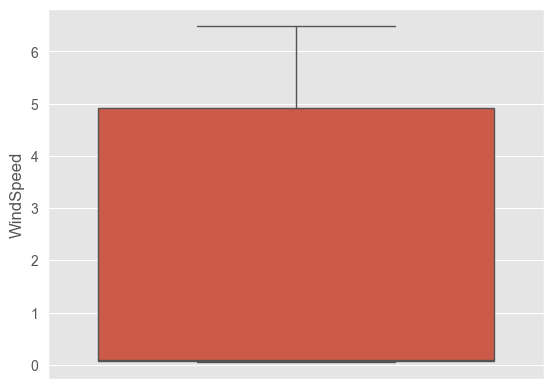

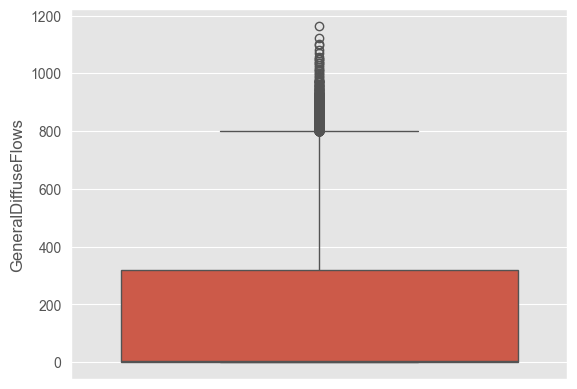

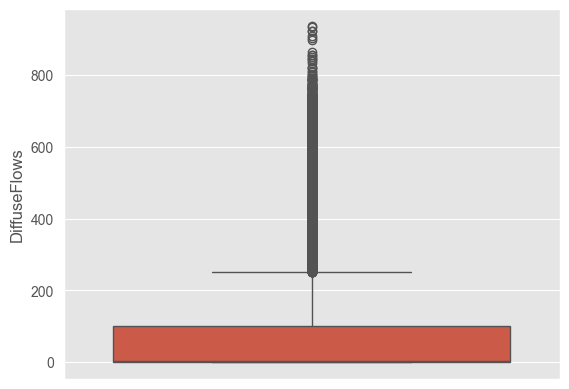

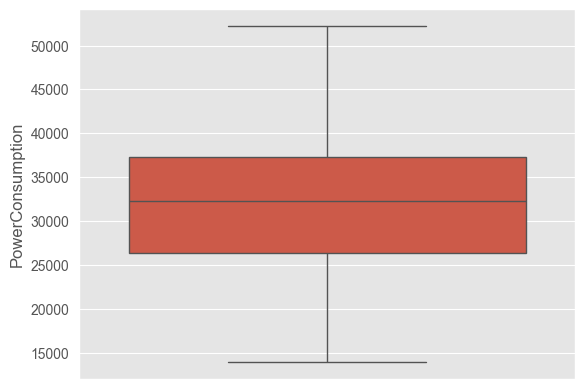

In [29]:
for feature in features:
    sns.boxplot(df_1[feature])
    plt.show()

In [32]:
df_2 = df_1.groupby(pd.Grouper(freq="30min")).mean()

In [33]:
df_2

,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows,PowerConsumption
Datetime,,,,,,
2017-01-01 00:00:00,6.428667,74.266667,0.082000,0.061000,0.101333,30999.493670
2017-01-01 00:30:00,5.941000,75.866667,0.081667,0.066000,0.096333,27396.455697
2017-01-01 01:00:00,5.605000,77.900000,0.082000,0.056333,0.110000,25407.594937
2017-01-01 01:30:00,5.492667,77.166667,0.082000,0.057333,0.115000,23906.835443
2017-01-01 02:00:00,5.000667,78.766667,0.082667,0.065000,0.127333,22474.936707
...,...,...,...,...,...,...
2017-12-30 21:30:00,7.913333,70.343333,0.081667,0.069333,0.087667,34786.311787
2017-12-30 22:00:00,7.793333,69.563333,0.081000,0.062333,0.108667,34660.583017
2017-12-30 22:30:00,7.403333,71.066667,0.082667,0.055000,0.107667,33326.235743


In [34]:
lag= 5

In [35]:
features

Index(['Temperature', 'Humidity', 'WindSpeed', 'GeneralDiffuseFlows',
       'DiffuseFlows', 'PowerConsumption'],
      dtype='object')

In [36]:
df_3 = df_2.copy()

In [37]:
lags = range(lag, 0, -1)
list(lags)
for lag in lags:
    for column in features:
        df_3[f"{column}_{lag}"] = df_3[column].shift(lag)
df_3

,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows,PowerConsumption,Temperature_5,Humidity_5,WindSpeed_5,GeneralDiffuseFlows_5,...,WindSpeed_2,GeneralDiffuseFlows_2,DiffuseFlows_2,PowerConsumption_2,Temperature_1,Humidity_1,WindSpeed_1,GeneralDiffuseFlows_1,DiffuseFlows_1,PowerConsumption_1
Datetime,,,,,,,,,,,,,,,,,,,,,
2017-01-01 00:00:00,6.428667,74.266667,0.082000,0.061000,0.101333,30999.493670,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-01 00:30:00,5.941000,75.866667,0.081667,0.066000,0.096333,27396.455697,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,6.428667,74.266667,0.082000,0.061000,0.101333,30999.493670
2017-01-01 01:00:00,5.605000,77.900000,0.082000,0.056333,0.110000,25407.594937,NaN,NaN,NaN,NaN,...,0.082000,0.061000,0.101333,30999.493670,5.941000,75.866667,0.081667,0.066000,0.096333,27396.455697
2017-01-01 01:30:00,5.492667,77.166667,0.082000,0.057333,0.115000,23906.835443,NaN,NaN,NaN,NaN,...,0.081667,0.066000,0.096333,27396.455697,5.605000,77.900000,0.082000,0.056333,0.110000,25407.594937
2017-01-01 02:00:00,5.000667,78.766667,0.082667,0.065000,0.127333,22474.936707,NaN,NaN,NaN,NaN,...,0.082000,0.056333,0.110000,25407.594937,5.492667,77.166667,0.082000,0.057333,0.115000,23906.835443
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-30 21:30:00,7.913333,70.343333,0.081667,0.069333,0.087667,34786.311787,9.710000,61.685000,0.075000,0.052667,...,0.086000,0.066000,0.090000,36846.641317,8.110000,69.006667,0.081333,0.077000,0.109000,35930.038023
2017-12-30 22:00:00,7.793333,69.563333,0.081000,0.062333,0.108667,34660.583017,9.196667,63.106667,0.074333,0.051333,...,0.081333,0.077000,0.109000,35930.038023,7.913333,70.343333,0.081667,0.069333,0.087667,34786.311787
2017-12-30 22:30:00,7.403333,71.066667,0.082667,0.055000,0.107667,33326.235743,8.933333,63.473333,0.074667,0.039333,...,0.081667,0.069333,0.087667,34786.311787,7.793333,69.563333,0.081000,0.062333,0.108667,34660.583017


In [39]:
df_4= df_3.dropna()

In [40]:
df_5 = df_4.drop(columns = ['Temperature', 'Humidity', 'WindSpeed', 'GeneralDiffuseFlows',
       'DiffuseFlows'])

In [41]:
df_5

,PowerConsumption,Temperature_5,Humidity_5,WindSpeed_5,GeneralDiffuseFlows_5,DiffuseFlows_5,PowerConsumption_5,Temperature_4,Humidity_4,WindSpeed_4,...,WindSpeed_2,GeneralDiffuseFlows_2,DiffuseFlows_2,PowerConsumption_2,Temperature_1,Humidity_1,WindSpeed_1,GeneralDiffuseFlows_1,DiffuseFlows_1,PowerConsumption_1
Datetime,,,,,,,,,,,,,,,,,,,,,
2017-01-01 02:30:00,21691.139240,6.428667,74.266667,0.082000,0.061000,0.101333,30999.493670,5.941000,75.866667,0.081667,...,0.082000,0.057333,0.115000,23906.835443,5.000667,78.766667,0.082667,0.065000,0.127333,22474.936707
2017-01-01 03:00:00,20992.405063,5.941000,75.866667,0.081667,0.066000,0.096333,27396.455697,5.605000,77.900000,0.082000,...,0.082667,0.065000,0.127333,22474.936707,5.108000,79.100000,0.082000,0.061000,0.131000,21691.139240
2017-01-01 03:30:00,20629.873417,5.605000,77.900000,0.082000,0.056333,0.110000,25407.594937,5.492667,77.166667,0.082000,...,0.082000,0.061000,0.131000,21691.139240,5.097000,77.600000,0.082667,0.059667,0.130000,20992.405063
2017-01-01 04:00:00,20512.405063,5.492667,77.166667,0.082000,0.057333,0.115000,23906.835443,5.000667,78.766667,0.082667,...,0.082667,0.059667,0.130000,20992.405063,4.911667,76.566667,0.083000,0.060000,0.152000,20629.873417
2017-01-01 04:30:00,20439.493670,5.000667,78.766667,0.082667,0.065000,0.127333,22474.936707,5.108000,79.100000,0.082000,...,0.083000,0.060000,0.152000,20629.873417,4.952333,74.733333,0.083667,0.058667,0.117333,20512.405063
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-30 21:30:00,34786.311787,9.710000,61.685000,0.075000,0.052667,0.108667,37690.240813,9.196667,63.106667,0.074333,...,0.086000,0.066000,0.090000,36846.641317,8.110000,69.006667,0.081333,0.077000,0.109000,35930.038023
2017-12-30 22:00:00,34660.583017,9.196667,63.106667,0.074333,0.051333,0.095333,37337.389100,8.933333,63.473333,0.074667,...,0.081333,0.077000,0.109000,35930.038023,7.913333,70.343333,0.081667,0.069333,0.087667,34786.311787
2017-12-30 22:30:00,33326.235743,8.933333,63.473333,0.074667,0.039333,0.120000,37171.102660,9.150000,64.506667,0.086000,...,0.081667,0.069333,0.087667,34786.311787,7.793333,69.563333,0.081000,0.062333,0.108667,34660.583017


In [42]:
x,y = df_5.drop(columns = "PowerConsumption"), df_5["PowerConsumption"]

In [43]:
x

,Temperature_5,Humidity_5,WindSpeed_5,GeneralDiffuseFlows_5,DiffuseFlows_5,PowerConsumption_5,Temperature_4,Humidity_4,WindSpeed_4,GeneralDiffuseFlows_4,...,WindSpeed_2,GeneralDiffuseFlows_2,DiffuseFlows_2,PowerConsumption_2,Temperature_1,Humidity_1,WindSpeed_1,GeneralDiffuseFlows_1,DiffuseFlows_1,PowerConsumption_1
Datetime,,,,,,,,,,,,,,,,,,,,,
2017-01-01 02:30:00,6.428667,74.266667,0.082000,0.061000,0.101333,30999.493670,5.941000,75.866667,0.081667,0.066000,...,0.082000,0.057333,0.115000,23906.835443,5.000667,78.766667,0.082667,0.065000,0.127333,22474.936707
2017-01-01 03:00:00,5.941000,75.866667,0.081667,0.066000,0.096333,27396.455697,5.605000,77.900000,0.082000,0.056333,...,0.082667,0.065000,0.127333,22474.936707,5.108000,79.100000,0.082000,0.061000,0.131000,21691.139240
2017-01-01 03:30:00,5.605000,77.900000,0.082000,0.056333,0.110000,25407.594937,5.492667,77.166667,0.082000,0.057333,...,0.082000,0.061000,0.131000,21691.139240,5.097000,77.600000,0.082667,0.059667,0.130000,20992.405063
2017-01-01 04:00:00,5.492667,77.166667,0.082000,0.057333,0.115000,23906.835443,5.000667,78.766667,0.082667,0.065000,...,0.082667,0.059667,0.130000,20992.405063,4.911667,76.566667,0.083000,0.060000,0.152000,20629.873417
2017-01-01 04:30:00,5.000667,78.766667,0.082667,0.065000,0.127333,22474.936707,5.108000,79.100000,0.082000,0.061000,...,0.083000,0.060000,0.152000,20629.873417,4.952333,74.733333,0.083667,0.058667,0.117333,20512.405063
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-30 21:30:00,9.710000,61.685000,0.075000,0.052667,0.108667,37690.240813,9.196667,63.106667,0.074333,0.051333,...,0.086000,0.066000,0.090000,36846.641317,8.110000,69.006667,0.081333,0.077000,0.109000,35930.038023
2017-12-30 22:00:00,9.196667,63.106667,0.074333,0.051333,0.095333,37337.389100,8.933333,63.473333,0.074667,0.039333,...,0.081333,0.077000,0.109000,35930.038023,7.913333,70.343333,0.081667,0.069333,0.087667,34786.311787
2017-12-30 22:30:00,8.933333,63.473333,0.074667,0.039333,0.120000,37171.102660,9.150000,64.506667,0.086000,0.066000,...,0.081667,0.069333,0.087667,34786.311787,7.793333,69.563333,0.081000,0.062333,0.108667,34660.583017


In [44]:
y

Datetime
2017-01-01 02:30:00    21691.139240
2017-01-01 03:00:00    20992.405063
2017-01-01 03:30:00    20629.873417
2017-01-01 04:00:00    20512.405063
2017-01-01 04:30:00    20439.493670
                           ...     
2017-12-30 21:30:00    34786.311787
2017-12-30 22:00:00    34660.583017
2017-12-30 22:30:00    33326.235743
2017-12-30 23:00:00    31249.683140
2017-12-30 23:30:00    28966.286437
Freq: 30min, Name: PowerConsumption, Length: 17467, dtype: float64

In [45]:
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.2, shuffle=False)

In [47]:
x_scaler = MinMaxScaler()
x_train_scaled = x_scaler.fit_transform(x_train)
x_test_scaled = x_scaler.transform(x_test)

In [49]:
y_scaler = MinMaxScaler()
y_train_scaled = y_scaler.fit_transform(y_train.to_numpy().reshape(-1,1))


In [50]:
lag = 5

In [51]:
x_train_scaled_shaped = x_train_scaled.reshape(x_train_scaled.shape[0],lag, x_train_scaled.shape[1] // lag)

In [52]:
x_test_scaled_shaped = x_test_scaled.reshape(x_test_scaled.shape[0],lag, x_test_scaled.shape[1] // lag)


In [54]:
model = Sequential([
    Input((x_train_scaled_shaped.shape[1], x_train_scaled_shaped.shape[2],)),
    LSTM(64, activation="relu", return_sequences=True),
    LSTM(32, activation="relu"),
    Dense(1, activation="linear")
])

In [55]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                   │ (None, 5, 64)          │        18,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 32)             │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 30,625 (119.63 KB)

 Trainable params: 30,625 (119.63 KB)

 Non-trainable params: 0 (0.00 B)

In [56]:
model.compile(
    loss="mean_squared_error",
    optimizer="adam",
    metrics=["mean_squared_error"],
)

In [57]:

history = model.fit(x_train_scaled_shaped, y_train_scaled, validation_split=0.20, epochs=16, batch_size=64, shuffle=False)

Epoch 1/16
175/175 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0516 - mean_squared_error: 0.0516 - val_loss: 0.0106 - val_mean_squared_error: 0.0106
Epoch 2/16
175/175 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0094 - mean_squared_error: 0.0094 - val_loss: 0.0068 - val_mean_squared_error: 0.0068
Epoch 3/16
175/175 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0059 - mean_squared_error: 0.0059 - val_loss: 0.0043 - val_mean_squared_error: 0.0043
Epoch 4/16
175/175 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0044 - mean_squared_error: 0.0044 - val_loss: 0.0029 - val_mean_squared_error: 0.0029
Epoch 5/16
175/175 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0035 - mean_squared_error: 0.0035 - val_loss: 0.0025 - val_mean_squared_error: 0.0025
Epoch 6/16
175/175 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0029 - mean_squared_error: 0.0029 - val_loss: 0.0024 - val_mean_squared_error: 0.0024
Epoch 7/16
175/175 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0026 - mean_squared_error: 0.0026 - val_loss: 0.00

<Axes: >

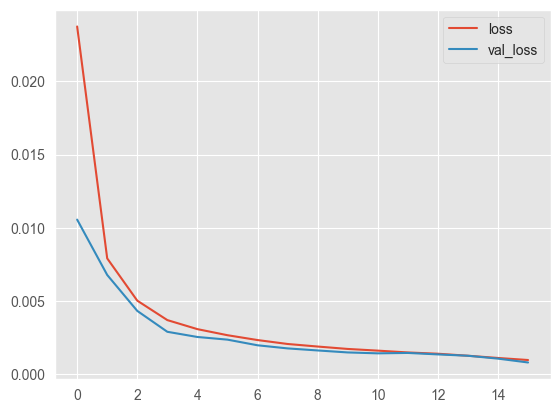

In [58]:
## Plot the loss function on the training and validation dataset
sns.lineplot(history.history["loss"], label="loss")
sns.lineplot(history.history["val_loss"], label="val_loss")

In [61]:
## Calculate the adequate metrics
pred_y_scaled = model.predict(x_test_scaled_shaped)

110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [62]:
pred_y = y_scaler.inverse_transform(pred_y_scaled)

In [63]:
regression_report(y_test, pred_y)

Regression Report:
Mean Square Error: 1347580.520047152
R2 Score: 0.9643995389088763
